# Housing Prices Prediction

In this project, we will explore and predict housing prices using a dataset from Kaggle. The goal is to build a predictive model for housing prices based on various features like area, number of bedrooms, and other attributes.

We will use 3 different machine learning models and evaluate their performance using appropriate metrics such as: 
- Mean Squared Error (MSE) 
- Root Mean Squared Error (RMSE) 
- R-squared (R²).


In [3]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Preprocessing

Before building models, we need to clean and preprocess the data. This involves handling missing values, encoding categorical variables, and normalizing numerical features.


In [5]:
# Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# Drop rows with missing values or fill with appropriate values
df = df.dropna() 

# Confirm no missing data
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

**Seeing as no missing values were present nor was there any rows missing beforehand. They appear as empty(or as 0) in both instances above.**

### Encoding Categorical Variables

We need to convert categorical variables (such as `mainroad`, `guestroom`, etc.) into numerical representations so that we can use them in our models.


In [9]:
# Apply one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                                 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Check the first few rows of the dataframe
df.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


## Exploratory Data Analysis (EDA)

Next we want to visualize the relationships between the numerical features and the target variable `price` to better understand the data.
We do this  by making a histogram of the prices to  frequency then followed by plotting a correlation heatmap


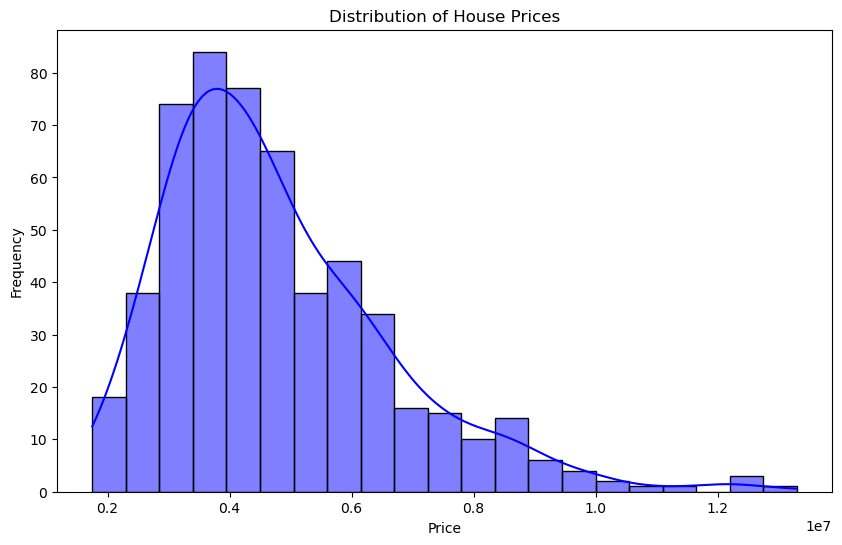

In [11]:
# Plot the distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


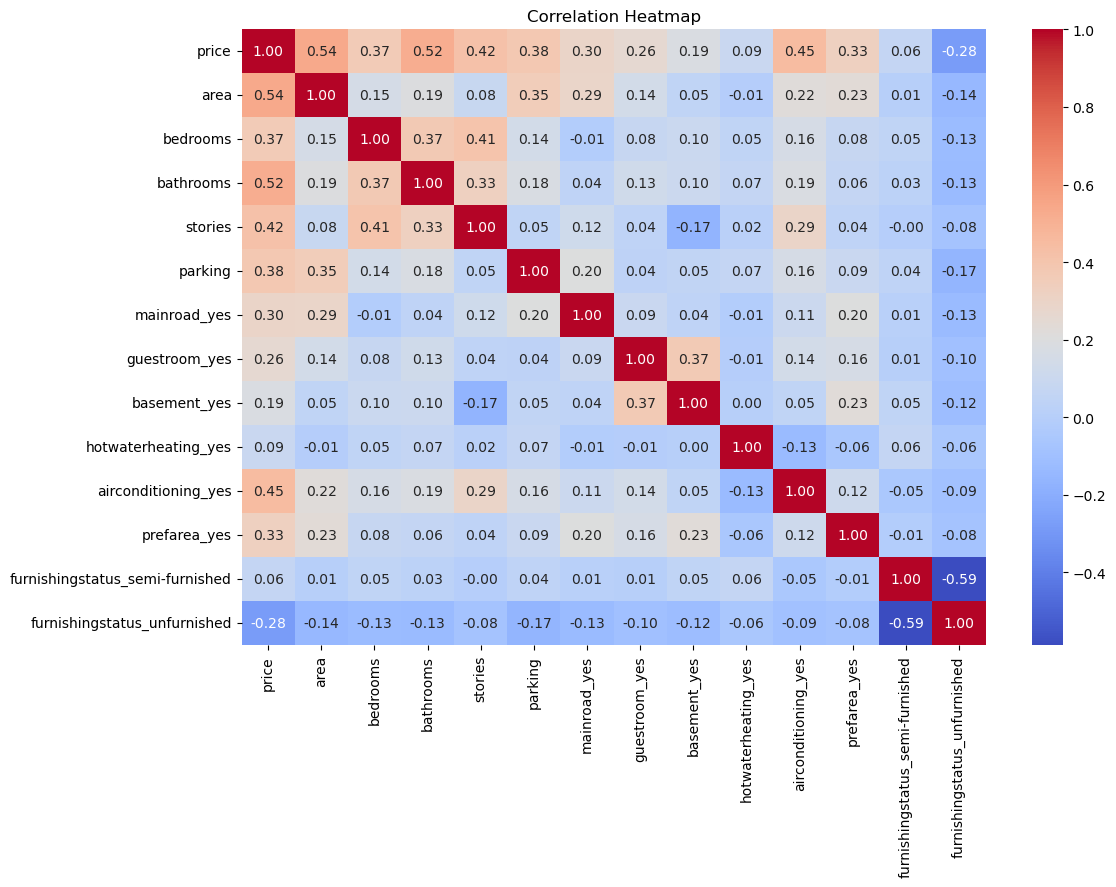

In [12]:
# Plot the correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

`The Heatmap above showing us the correlation between all the available columns from the dataset, as an example suggesting a strong correlation between:`
- Price ant itself
- Price and area
- Price and bathrooms
- Price and stories
- Price and hotwaterheating

## Train-Test Split

We will now split the dataset into features (X) and the target variable (y), and then further split it into training and testing sets.


In [15]:
# Split the data into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression Model

First, we'll train a Linear Regression model and evaluate its performance.


In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model using MSE, RMSE, and R²
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr}")
print(f"Linear Regression - R²: {r2_lr}\n")

joblib.dump(lr_model, 'LR_model.pkl')
print("Model saved successfully!")


Linear Regression - RMSE: 1324506.9600914388
Linear Regression - R²: 0.6529242642153182

Model saved successfully!


**Linear Regression** performed the best in terms of R² (65.29%), meaning it explains more variance in the target variable compared to the other models.

However, it assumes a linear relationship between features and the target, which might not be the best assumption for real estate pricing.

**The RMSE** is lower than both Random Forest and XGBoost, meaning its absolute prediction errors are lower.

**Potential Issues** could be how the model may not capture complex, non-linear relationships in the data and its shown to be sensitive to outliers and multicollinearity among features.

## Random Forest Regressor

Next, we’ll train a Random Forest Regressor model to see if we can achieve better results.


In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using MSE, RMSE, and R²
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - R²: {r2_rf}\n")

joblib.dump(rf_model, 'RF_model.pkl')
print("Model saved successfully!")


Random Forest - RMSE: 1400565.9728553821
Random Forest - R²: 0.611918531405699

Model saved successfully!


**Random Forest** is less accurate than Linear Regression (R² = 61.19%) but still explains a fair amount of variance.

**RMSE** is higher than Linear Regression, meaning it makes slightly larger errors on average.

Since it’s an ensemble of decision trees, it captures non-linear relationships better than Linear Regression but might be overfitting slightly.

**Potential Issues** could be how the Higher RMSE results suggests some overfitting. It may perform well on training data but slightly worse on test data.
Also how the Feature importance interpretation is harder than Linear Regression and its also Computationally more expensive than Linear Regression.

## XGBoost Regressor

Finally, we’ll try the XGBoost Regressor, which is often more powerful for complex datasets.


In [23]:
#we made sure to install xgboost in a cell before hand using the command : !pip install xgboost
#but afterwards removed the cell so it isn't run everytime the program is run.
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500], 
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 9, 12], 
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


# Initialize model
xgb_model = XGBRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1, 
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train model with best params
xgb_tuned = XGBRegressor(**best_params, random_state=42)
xgb_tuned.fit(X_train, y_train)

# Predictions
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Evaluation metrics
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print(f"Tuned XGBoost - RMSE: {rmse_xgb_tuned}")
print(f"Tuned XGBoost - R²: {r2_xgb_tuned}\n")

joblib.dump(xgb_tuned, 'tuned_XGB_model.pkl')
print("Model saved successfully!")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Tuned XGBoost - RMSE: 1329536.97039938
Tuned XGBoost - R²: 0.6502830982208252

Model saved successfully!


### Hyperparameter Tuning of XGBoost

Initially, we trained an XGBoost model using default hyperparameters, which yielded the following results:

- **Root Mean Squared Error (RMSE):** 1,440,789  
- **R² Score:** 0.589  

and with Default values XGBoost performed the worst in terms of both RMSE and R², explaining only 58.93% of variance and having the highest error (RMSE = 1.44M). Because of this we followed up with some hyperparameters tuning.

**In order to systematically improve the model’s performance**, we focused on tuning the following hyperparameters:

- **`n_estimators` (Number of trees)**  
  - Controls the number of boosting rounds.  
  - Initially set to **100**; later tested values up to **500**.  
  - A higher value allows the model to learn more but can lead to overfitting.  

- **`learning_rate` (Step size for boosting updates)**  
  - Determines how much each tree contributes to the final prediction.  
  - Initially set at **0.1**, later reduced to **0.05** and **0.01** to achieve better generalization.  

- **`max_depth` (Depth of each tree)**  
  - Controls model complexity—deeper trees capture more patterns but risk overfitting.  
  - Initially set to **default**, later optimized between **3, 6, and 9**.  
  - The best-performing depth was **3**, indicating a simpler model generalizes better.  

- **`min_child_weight` (Minimum sum of instance weights needed for further partitioning a node)**  
  - Prevents overfitting by restricting overly complex splits.  
  - Tuned across **1, 3, and 5**, with **3** performing best.  

- **`subsample` (Fraction of training samples used per boosting round)**  
  - Introduces randomness to reduce overfitting.  
  - Tested values **0.6, 0.8, and 1.0**, with **0.8** giving the best balance.  

- **`colsample_bytree` (Fraction of features used per tree)**  
  - Prevents excessive reliance on any one feature.  
  - Experimented with **0.6, 0.8, and 1.0**, settling on **0.6** for better generalization.  

**We then got to** implementing **GridSearchCV** to systematically explore various hyperparameter combinations. After testing **972 configurations across 5-fold cross-validation**, the optimal hyperparameters were found to be:

- `n_estimators`: **100**  
- `learning_rate`: **0.05**  
- `max_depth`: **3**  
- `min_child_weight`: **3**  
- `subsample`: **0.8**  
- `colsample_bytree`: **0.6**  

**After tuning**, the optimized XGBoost model achieved:

- **RMSE:** **1,329,536** (Improved from `1,440,789` as lower is better in this case)  
- **R² Score:** **0.650** ( Improved from `0.589 as` higher is better in this case)  

`This shows a nice and great improvement in prediction accuracy, reducing error while maintaining generalization.`

**A small Conclusion on the  tuning process:**
Through systematic hyperparameter tuning, we ended up successfully enhancing XGBoost’s predictive performance. The final model strikes a balance between complexity and generalization, outperforming the untuned version while remaining competitive with other models tested and now its no longer the worst performing model! 


## Model Comparison

And finally just a comparrison of the RMSE and R² scores of all three models to see which one performed the best.


In [26]:

print("\033[1mCompare RMSE for all models:\033[0m")
print(f"Linear Regression RMSE: {rmse_lr}\n")
print(f"Random Forest RMSE: {rmse_rf}\n")
print(f"XGBoost RMSE: {rmse_xgb_tuned}\n\n")

print("\033[1mCompare R²  for all models:\033[0m")
print(f"Linear Regression R²: {r2_lr}\n")
print(f"Random Forest R²: {r2_rf}\n")
print(f"XGBoost R²: {r2_xgb_tuned}\n")


Compare RMSE for all models:
Linear Regression RMSE: 1324506.9600914388

Random Forest RMSE: 1400565.9728553821

XGBoost RMSE: 1329536.97039938


Compare R²  for all models:
Linear Regression R²: 0.6529242642153182

Random Forest R²: 0.611918531405699

XGBoost R²: 0.6502830982208252



## Deploying the Model

after training the model and some nice results, we can deploy it into an application. Here's an example of how we saved the trained model to load it later for use in a web application or user interface.


In [28]:
# Prepare your input as a DataFrame with the exact column names as the encoded dataset
sample_input = pd.DataFrame(
    [[7420, 4, 2, 3, 2, True, False, False, False, True, True, False, False]],  # Example row with new data
    columns=['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 
             'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes',
             'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
)

# Use the model to predict (assuming model is already loaded)
predicted_price1 = lr_model.predict(sample_input)
predicted_price2 = rf_model.predict(sample_input)
predicted_price3 = xgb_tuned.predict(sample_input)

print(f"Predicted Price using Linear Regression: {predicted_price1[0]}\n")
print(f"Predicted Price using Random Forest: {predicted_price2[0]}\n")
print(f"Predicted Price using XGBoost: {predicted_price3[0]}")

Predicted Price using Linear Regression: 7968276.126387378

Predicted Price using Random Forest: 8694707.0

Predicted Price using XGBoost: 9159728.0


## Conclusion

In this notebook, we have explored housing price prediction using three different machine learning models: Linear Regression, Random Forest, and XGBoost. We evaluated their performance using key metrics such as RMSE and R². Through hyperparameter tuning, we were able to significantly improve the performance of the XGBoost model, achieving a lower RMSE and a higher R² score compared to the initial setup. 

Beyond model evaluation, we also discussed potential next steps, including saving the trained models and deploying them in a real-world application. Moving forward, further fine-tuning and the creation of a user-friendly interface for predictions could enhance the model's accessibility and usability in practical settings.
